# Data for Classification

#### Import Dependancies

In [16]:
import numpy as np
from utils_common import dlc, plot_data, draw_vthresh, compute_model_output
import matplotlib.pyplot as plt


plt.style.use('./deeplearning.mplstyle')

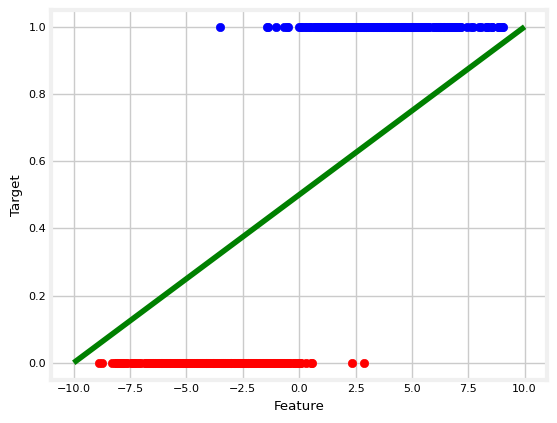

In [17]:
# Can we use Linear Regression for classification?
correlation = 0.8       # Correlation between -1 and 1
n = 300                 # Sample

xx = np.array([-10, 2.5])
yy = np.array([0, 0])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
covs = [[stds[0]**2, stds[0]*stds[1]*correlation], 
[stds[0]*stds[1]*correlation, stds[1]**2]] 
o = np.random.multivariate_normal(means, covs, n).T

xx = np.array([-2.5, 10])
yy = np.array([1, 1])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
covs = [[stds[0]**2, stds[0]*stds[1]*correlation], 
[stds[0]*stds[1]*correlation, stds[1]**2]] 
n = np.random.multivariate_normal(means, covs, n).T

m = 0.05
b = 0.5
# Anything close to these values is acceptable

tmp_f_mb = compute_model_output(np.array([-10, 10]), m, b,)

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(o[0], o[1], color='red')
plt.scatter(n[0], n[1], color='blue')
plt.plot(np.array([-10, 10]), tmp_f_mb, c='g',label='Our Prediction')
plt.grid(True)
plt.show()

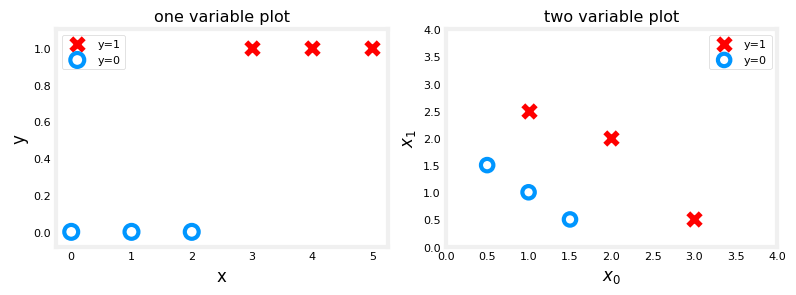

In [18]:
# Visualise classification
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

A simple logistic function

$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$

| Symbol | |
| --- | --- |
| $f$ | A function indicating a rule that assigns a unique output value (y) for each input value (x) |
| $w$ | Weight is the importance or influence of each feature on the prediction |
| $b$ | Bias is a constant that shifts the decision boundary |
| $x$ | Feature(s) |

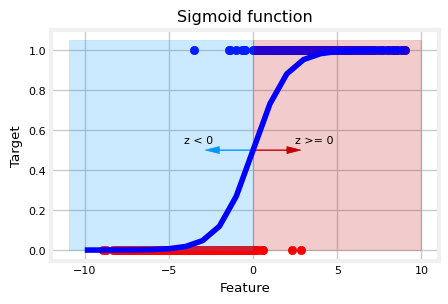

In [19]:
# Sigmoid Function & Decsion Boundary
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
z_tmp = np.arange(-10,10)
y = sigmoid(z_tmp)

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

plt.xlabel("Parameters (Coef & y_intercept)")
plt.ylabel("Cost")

ax.set_title("Sigmoid function")
ax.set_ylabel('Target')
ax.set_xlabel('Feature')
ax.scatter(o[0], o[1], color='red')
ax.scatter(n[0], n[1], color='blue')
ax.grid(True)
draw_vthresh(ax,0)
plt.show()

#### What happens next?